In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

EDA - 1

In [2]:
#Title: Bike Details Dataset
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/DATA ANALYICS/EDA/BIKE DETAILS.csv')
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [ ]:
df.sample(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
900,Bajaj Pulsar 150 [2001-2011],35000,2008,Individual,1st owner,70000,NaN
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0
650,Suzuki Gixxer SF Fi,100000,2019,Individual,1st owner,7000,103170.0
17,Yamaha YZF R15 S,40000,2010,Individual,2nd owner,45000,117926.0
601,Honda Dio,23000,2010,Individual,1st owner,40000,NaN
1048,Hero Glamour,25000,2015,Individual,1st owner,18000,57000.0
888,Royal Enfield Thunderbird 350,120000,2015,Individual,1st owner,10000,NaN
312,Hero Xtreme 2014,35000,2013,Individual,1st owner,15000,72973.0
1017,Yamaha FZ S V 2.0,48000,2017,Individual,1st owner,23000,84000.0
353,Suzuki Gixxer [2014-2018],62000,2017,Individual,1st owner,15000,78316.0


In [ ]:
#Questions

In [ ]:
#1. What is the range of selling prices in the dataset?

a = df.selling_price.min()
b = df.selling_price.max()
print(f'The range of selling price is {a} to {b}')






The range of selling price is 5000 to 760000


In [ ]:
#2. What is the median selling price for bikes in the dataset?
df.selling_price.median()


45000.0

In [ ]:
#3. What is the most common seller type?
df.seller_type.mode()

,seller_type
0,Individual


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
a = df[df.km_driven> 50000].shape
print(a)

(170, 7)


In [ ]:
#5.What is the average km_driven value for each ownership type?
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
#6.What proportion of bikes are from the year 2015 or older?
prop = (df['year']<2015).sum()/len(df)
print(f"Proportion of bikes from 2015 or older: {prop}")


Proportion of bikes from 2015 or older: 0.472196041470311


In [ ]:
#7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
a = df.ex_showroom_price.max()
print(f"The highest ex_showroom_price recorded is {a} of bike {df[df.ex_showroom_price == a]['name'].iloc[0]}")

The highest ex_showroom_price recorded is 1278000.0 of bike Harley-Davidson Street Bob


In [ ]:
#9.What is the total number of bikes listed by each seller type?
df.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


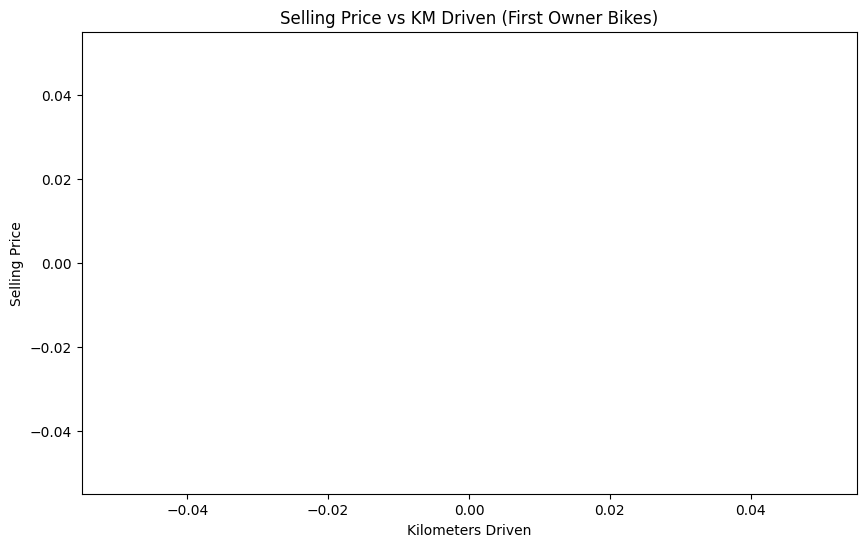

Correlation between selling price and km driven: nan


In [ ]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
b = df.owner == 'First Owner'
b = df[b]

plt.figure(figsize=(10,6))
sns.scatterplot(data=b, x='km_driven', y='selling_price')
plt.title('Selling Price vs KM Driven (First Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()
correlation = b['selling_price'].corr(b['km_driven'])
print("Correlation between selling price and km driven:", correlation)


In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print("Number of outliers:", len(outliers))
df = df.drop(outliers.index)
print("Number of outliers removed:", len(outliers))

Number of outliers: 0
Number of outliers removed: 0


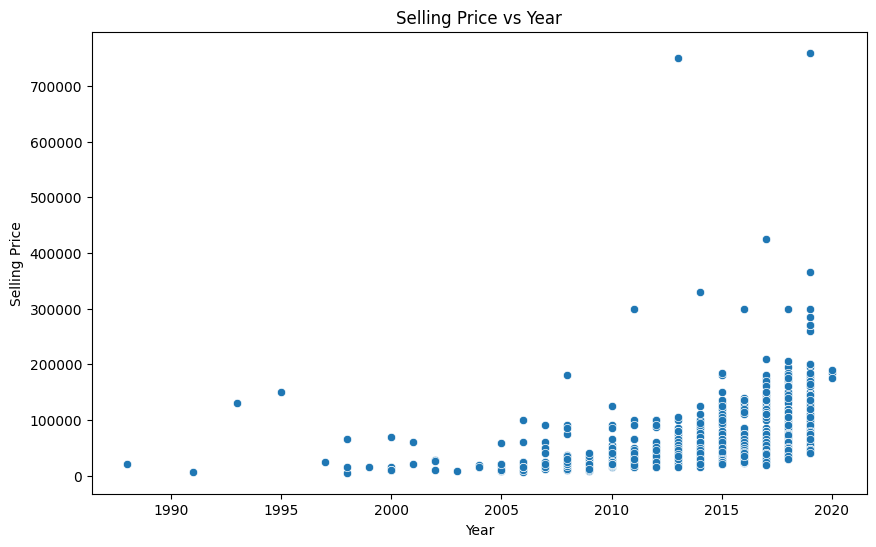

In [ ]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2023
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation = df.groupby('age')['depreciation'].mean()
print("Average depreciation in selling price based on bike age:")
print(average_depreciation)

Average depreciation in selling price based on bike age:
age
3     34260.000000
4     -2954.562500
5    -13023.194805
6    -22307.226190
7    -28750.407407
8    -28314.291139
9    -34287.812500
10   -42766.423077
11   -37556.709677
12   -48027.354839
13   -46757.280000
14   -41398.909091
15   -53021.166667
16   -42399.000000
17   -39664.500000
18   -44852.000000
19   -36852.000000
20             NaN
21             NaN
22   -34852.000000
23             NaN
24             NaN
25             NaN
26             NaN
28             NaN
30             NaN
32             NaN
35             NaN
Name: depreciation, dtype: float64


In [ ]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
average_price = df.groupby('year')['selling_price'].mean()
df['average_price'] = df['year'].map(average_price)
df['price_difference'] = df['selling_price'] - df['average_price']
significant_prices = df[df['price_difference'] > 2 * df['price_difference'].std()]
print("Bike names priced significantly above the average price for their manufacturing year:")
print(significant_prices['name'])


Bike names priced significantly above the average price for their manufacturing year:
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
146                              KTM RC 390
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
449           Royal Enfield Classic Signals
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


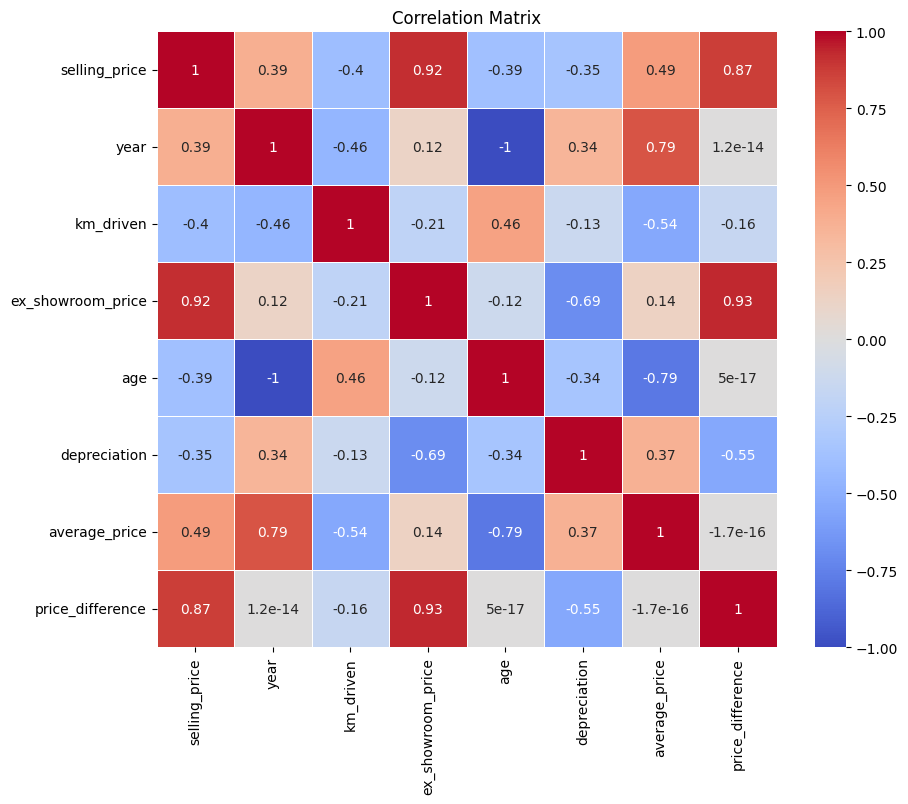

In [ ]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

EDA - 2

**Title - Car Sale Dataset**

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/DATA ANALYICS/EDA/Car Sale.csv')
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df1.tail()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [ ]:
df.sample(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,average_price,price_difference
855,Bajaj Discover 150,35000,2015,Individual,1st owner,12000,54299.0,8,-19299.0,56313.131313,-21313.131313
708,Yamaha Fascino 110,55000,2019,Individual,1st owner,7000,57112.0,4,-2112.0,119689.511628,-64689.511628
733,TVS Star City Plus,50000,2016,Individual,2nd owner,14000,NaN,7,NaN,57924.126214,-7924.126214
1000,Honda CBR 150,60000,2015,Individual,1st owner,32000,120000.0,8,-60000.0,56313.131313,3686.868687
105,Suzuki Gixxer SF,80000,2018,Individual,1st owner,12500,NaN,5,NaN,87660.374046,-7660.374046


In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
df1.groupby('Dealer_Name')['Price ($)'].mean()


,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


Company
Acura          8183.046414
Audi          12904.243867
BMW           15065.578723
Buick         17142.232626
Cadillac      19517.120220
Chevrolet     13311.063223
Chrysler      11583.286811
Dodge         11187.592085
Ford          15849.090227
Honda         11148.629062
Hyundai        3485.982649
Infiniti      13696.332844
Jaguar        10222.531533
Jeep           9459.834418
Lexus         17852.923492
Lincoln       19658.050211
Mercedes-B    15722.807459
Mercury       16445.172195
Mitsubishi    11671.343035
Nissan        16214.264017
Oldsmobile    15711.345857
Plymouth      19065.997338
Pontiac       14348.963592
Porsche        5261.839206
Saab          19653.740089
Saturn        15990.223671
Subaru        12920.771620
Toyota        15367.131714
Volkswagen    12527.124011
Volvo         12933.790185
Name: Price ($), dtype: float64


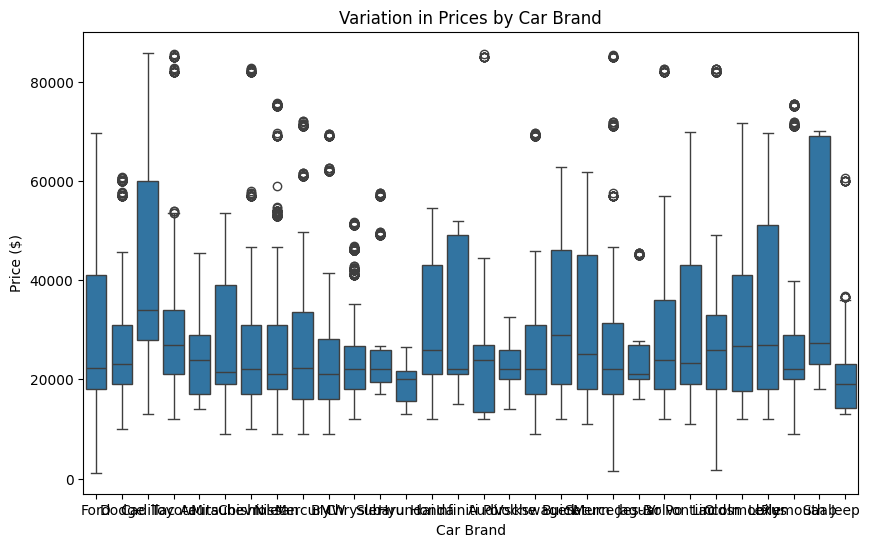

In [ ]:
#2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
b = df1.groupby('Company')['Price ($)'].std()
print(b)
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='Company', y='Price ($)')
plt.title('Variation in Prices by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price ($)')
plt.show()

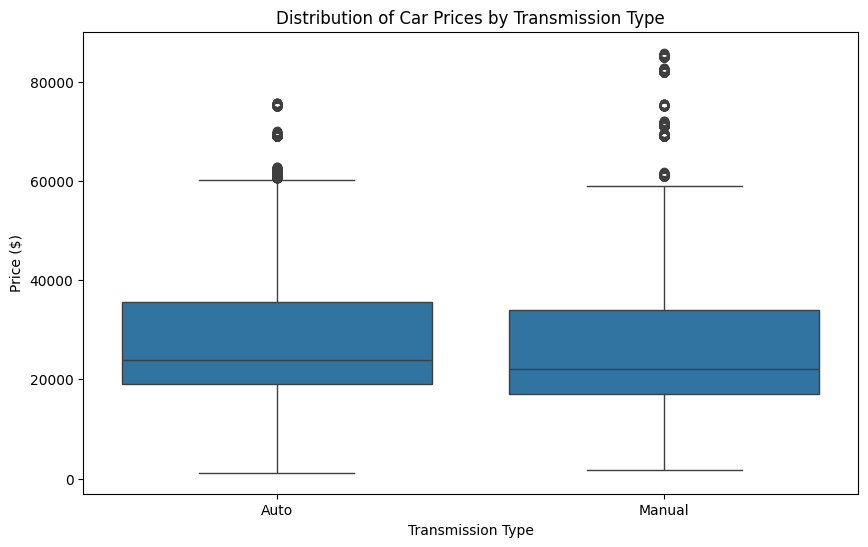

Interquartile Ranges for each transmission type:
 Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [ ]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()
transmission_groups = df1.groupby('Transmission')['Price ($)']

iqr_values = transmission_groups.quantile(0.75) - transmission_groups.quantile(0.25)
print("Interquartile Ranges for each transmission type:\n", iqr_values)


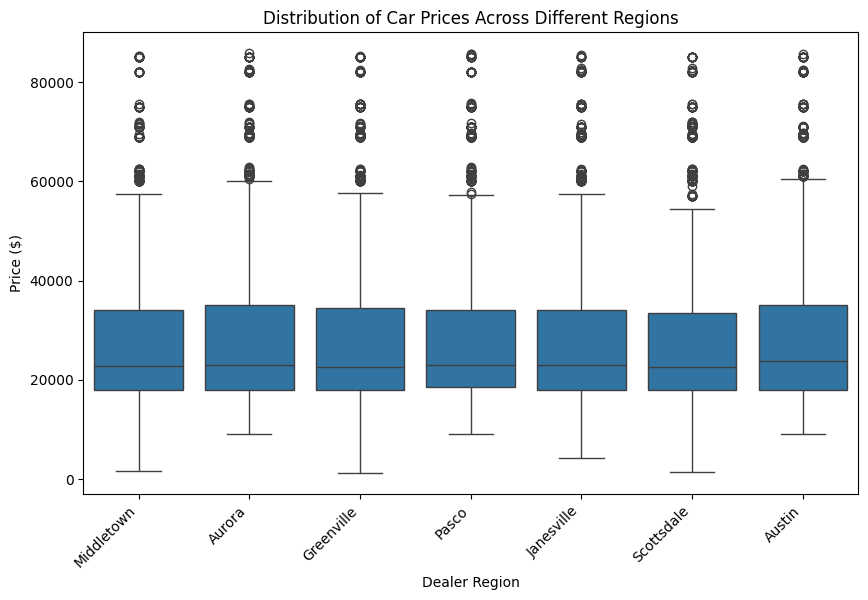

Dealer_Region
Aurora        15026.207252
Austin        14903.884549
Greenville    15101.538328
Janesville    14344.995638
Middletown    14619.842395
Pasco         14659.315941
Scottsdale    14902.916820
Name: Price ($), dtype: float64


In [ ]:
#4.What is the distribution of car prices across different regions?
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)') # Use boxplot to visualize distribution
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()
b = df1.groupby('Dealer_Region')['Price ($)'].std()
print(b)

In [ ]:
#5.What is the distribution of cars based on body styles?
df1['Body Style'].value_counts()


,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?
df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

In [ ]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
a = df1.groupby('Dealer_Region')['Price ($)'].count()
print(a)
b = df1.groupby('Dealer_Region')['Model'].count()
print(b)

Dealer_Region
Aurora        3130
Austin        4135
Greenville    3128
Janesville    3821
Middletown    3128
Pasco         3131
Scottsdale    3433
Name: Price ($), dtype: int64
Dealer_Region
Aurora        3130
Austin        4135
Greenville    3128
Janesville    3821
Middletown    3128
Pasco         3131
Scottsdale    3433
Name: Model, dtype: int64


In [ ]:
#8. How does the average car price differ between cars with different engine sizes?
df1.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


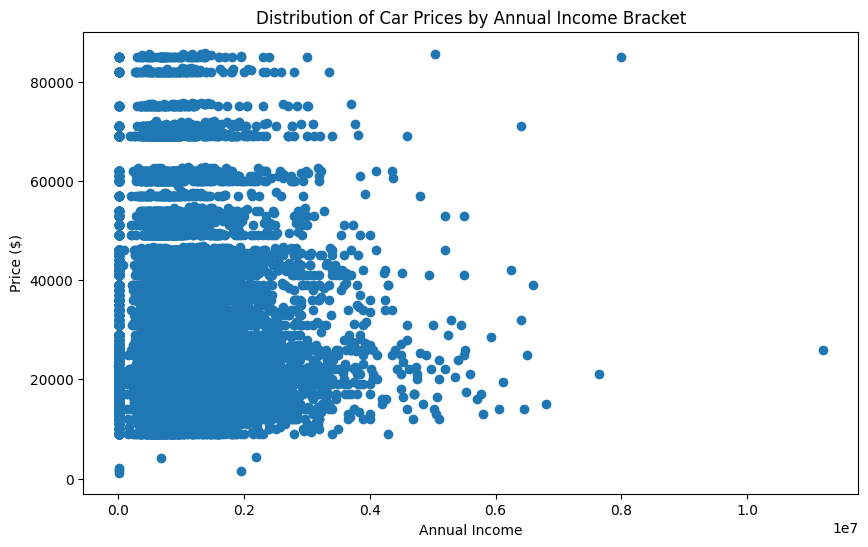

In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket?
df1.groupby('Annual Income')['Price ($)'].count()
plt.figure(figsize=(10,6))
plt.scatter(data=df1, x='Annual Income', y='Price ($)')
plt.title('Distribution of Car Prices by Annual Income Bracket')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.show()

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


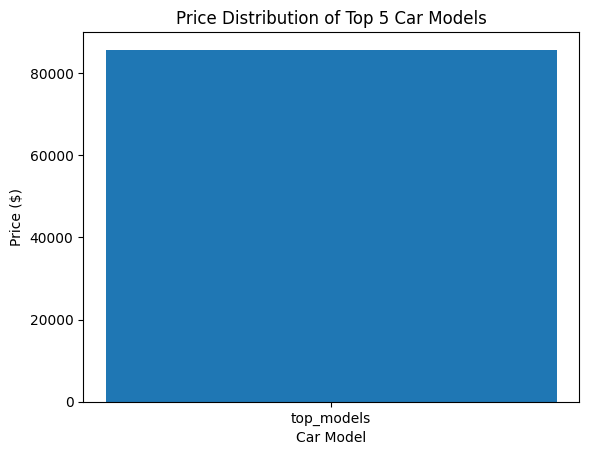

In [ ]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df1['Model'].value_counts().head(5)
print(top_models)

plt.bar(data=df1, x='top_models', height='Price ($)')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.show()

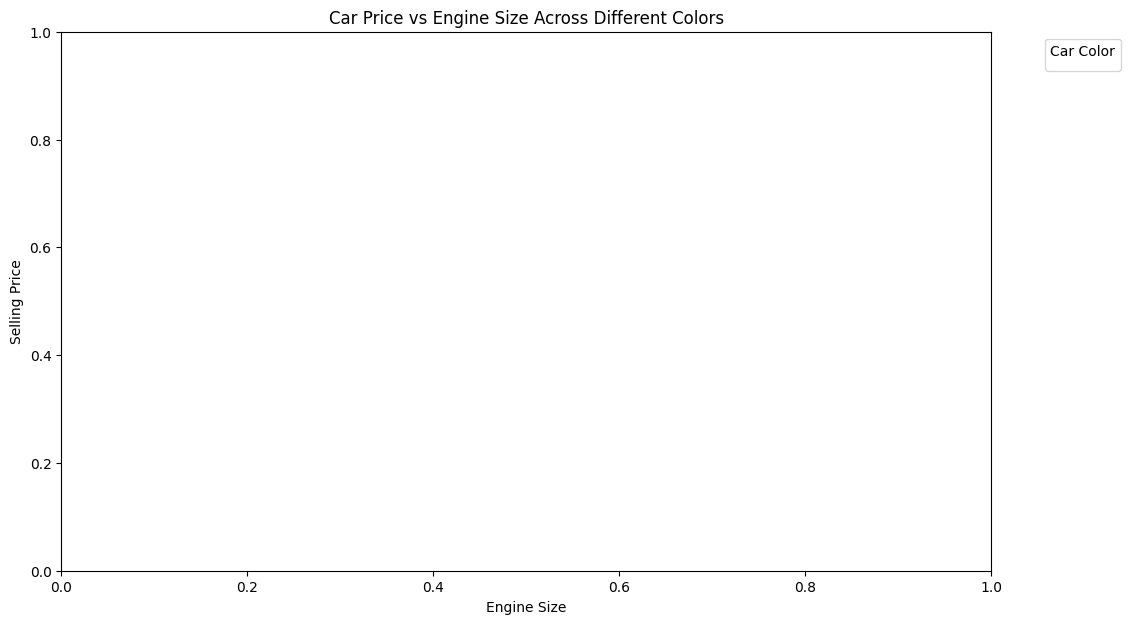

In [ ]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
sns.scatterplot(data=df1, x='Engine', y='Price ($)', hue='Color', palette='Set2')
plt.title('Car Price vs Engine Size Across Different Colors')
plt.xlabel('Engine Size')
plt.ylabel('Selling Price')
plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


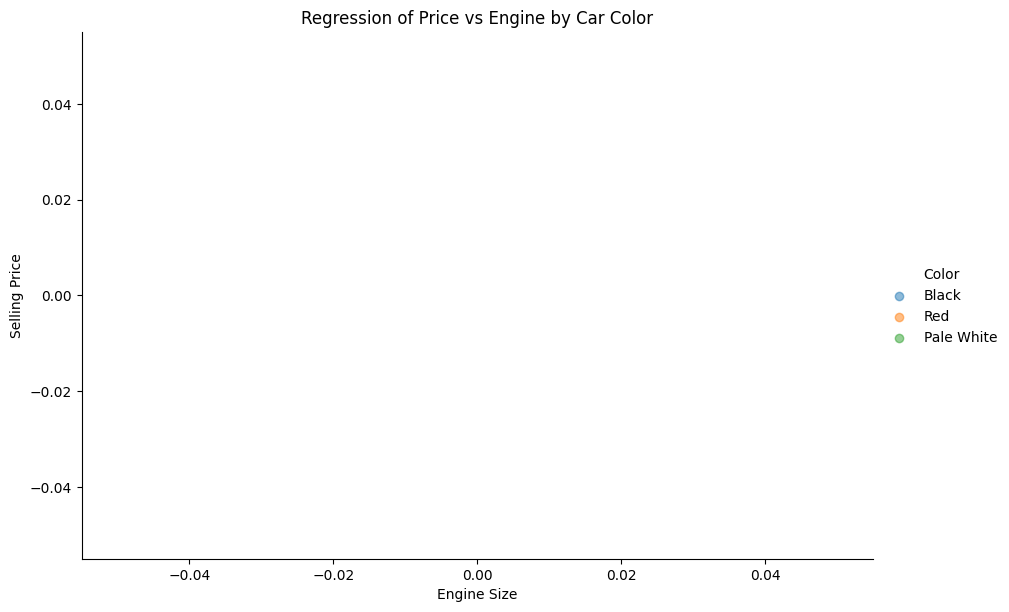

In [ ]:
sns.lmplot(data=df1, x='Engine', y='Price ($)', hue='Color', height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Regression of Price vs Engine by Car Color')
plt.xlabel('Engine Size')
plt.ylabel('Selling Price')
plt.show()


In [ ]:
iqr_by_Color = df1.groupby('Color')['Price ($)'].quantile(0.75) - df1.groupby('Color')['Price ($)'].quantile(0.25) # Changed df to df1 in the second part of the expression
iqr_by_color = iqr_by_Color.sort_values(ascending=False)  # Corrected variable name from iqr_by_color to iqr_by_Color

print("Price IQR (variation) per car color:\n", iqr_by_color)


Price IQR (variation) per car color:
 Color
Black         18000.0
Pale White    15000.0
Red           15000.0
Name: Price ($), dtype: float64


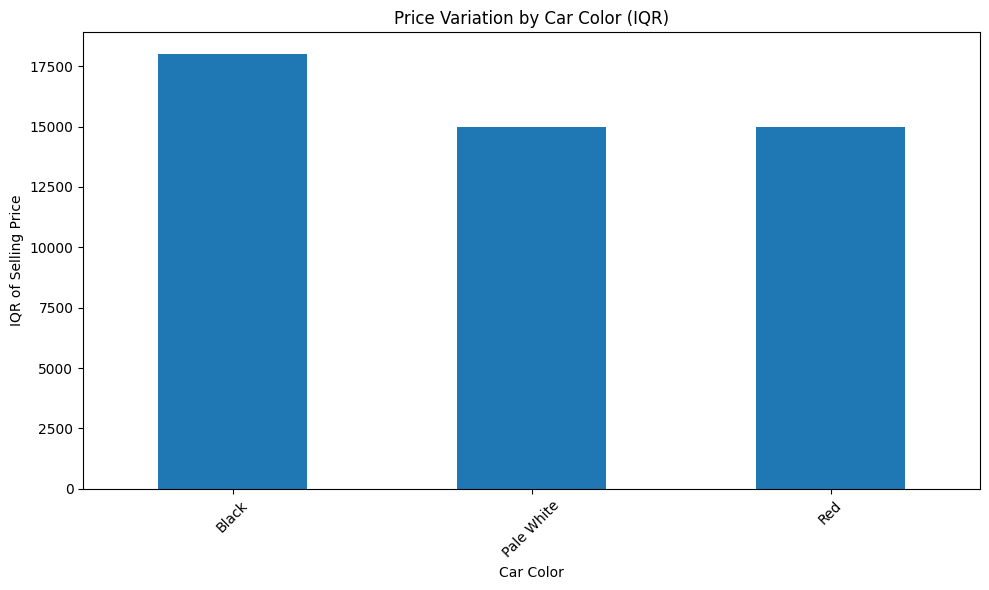

In [ ]:
iqr_by_color.plot(kind='bar', figsize=(10,6), title='Price Variation by Car Color (IQR)')
plt.ylabel('IQR of Selling Price')
plt.xlabel('Car Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


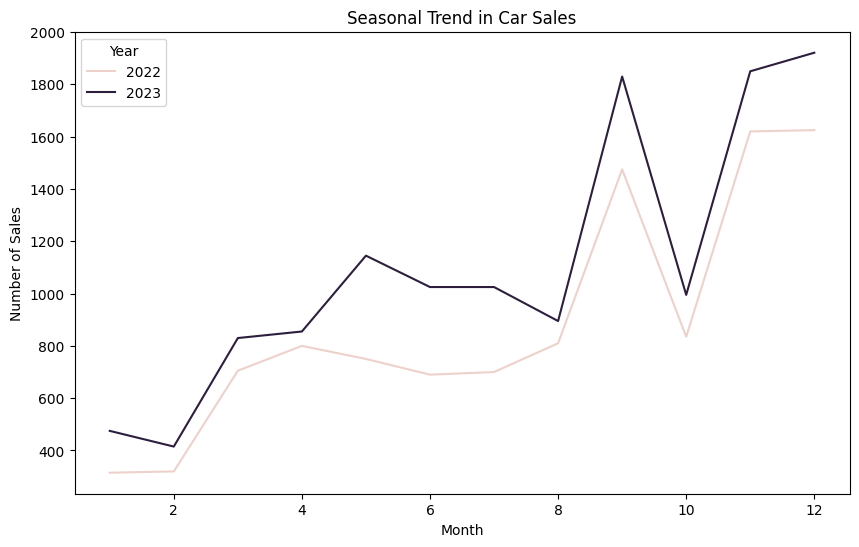

In [ ]:
#12.Is there any seasonal trend in car sales based on the date of sale?
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
monthly_sales = df1.groupby(['Year', 'Month'])['Model'].count().reset_index() # Reset index to convert to DataFrame
#monthly_sales
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='Model', hue='Year')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.legend(title='Year')


In [5]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
df1.groupby(['Body Style', 'Transmission']).size()


Body Style  Transmission
Hardtop     Auto            1408
            Manual          1563
Hatchback   Auto            3458
            Manual          2670
Passenger   Auto            2020
            Manual          1925
SUV         Auto            3086
            Manual          3288
Sedan       Auto            2599
            Manual          1889
dtype: int64

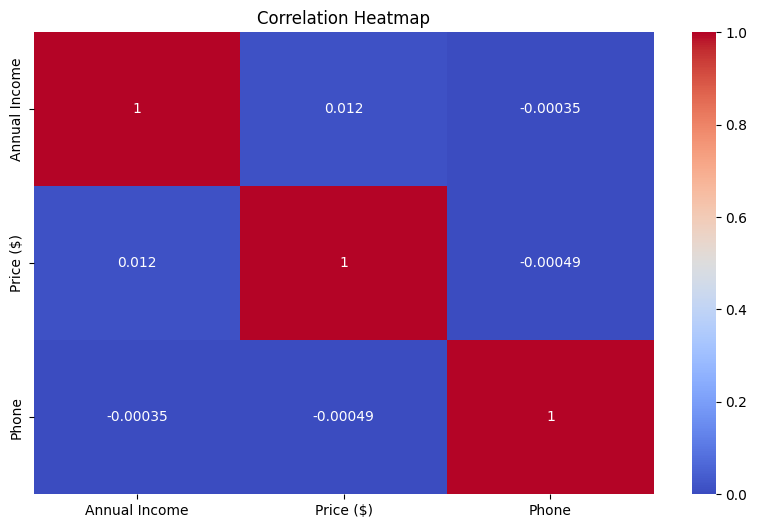

In [9]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
plt.figure(figsize=(10,6))

numeric_df1 = df1.select_dtypes(include=['number'])
sns.heatmap(numeric_df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()








In [14]:
#15. How does the average car price vary across different car models and engine types?
df1.groupby(['Model', 'Engine'])['Price ($)'].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


**EDA - 3**


**Amazon Sales Data**

In [15]:
df2 = pd.read_csv('/content/drive/MyDrive/DATA ANALYICS/EDA/amazon.csv')
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [23]:
#1.What is the average rating for each product category?
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
# errors='coerce' will replace invalid values with NaN

# Now calculate the average rating
average_rating_by_category = df2.groupby('category')['rating'].mean()
print(average_rating_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [25]:
#2.What are the top rating_count products by category?
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce')
top_rating_count_products = df2.groupby('category')['rating_count'].max()
print(top_rating_count_products)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

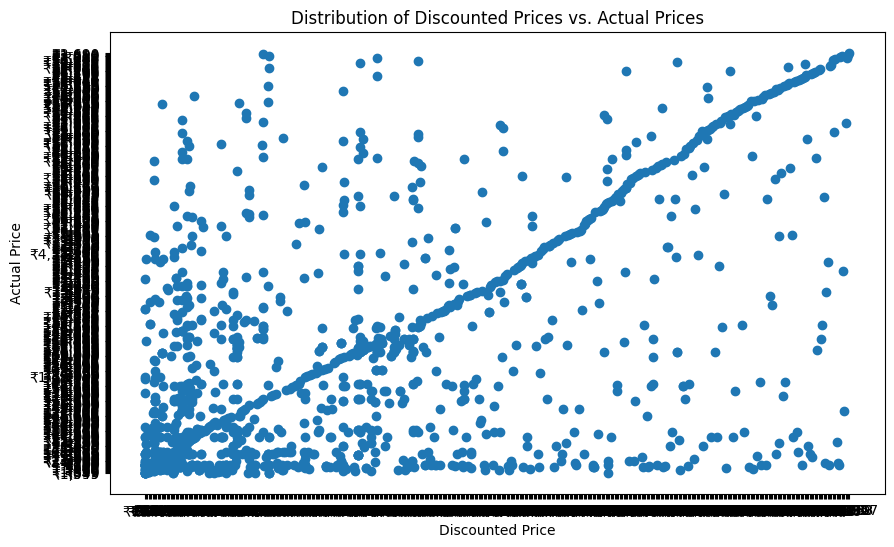

In [35]:
#3.What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10,6))
plt.scatter(data=df2, x='discounted_price', y='actual_price')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.show()

In [36]:
#4. How does the average discount percentage vary across categories?
df2['discount_percentage'] = pd.to_numeric(df2['discount_percentage'], errors='coerce')
df2.groupby('category')['discount_percentage'].mean


<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7ab8dafc5290>>

In [38]:
#5.What are the most popular product names?
df2['product_name'].max()

'tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV'

In [40]:
#6. What are the most popular product keywords?

print(df2.columns)  # Print column names for verification

# Assuming the column is named 'product_keyword' instead of 'product_keywords'
if 'product_keyword' in df2.columns:
    most_popular_keyword = df2['product_keyword'].value_counts().idxmax()
    print("Most popular product keyword:", most_popular_keyword)
else:
    print("Column 'product_keywords' or 'product_keyword' not found in the DataFrame.")

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
Column 'product_keywords' or 'product_keyword' not found in the DataFrame.


In [46]:
#7.What are the most popular product reviews?
df2['review_title'].max()

'💥,Considering the price range, it’s a good one,Worthy,Good products,Good,Good as brand,Ok Product,Value for money,'

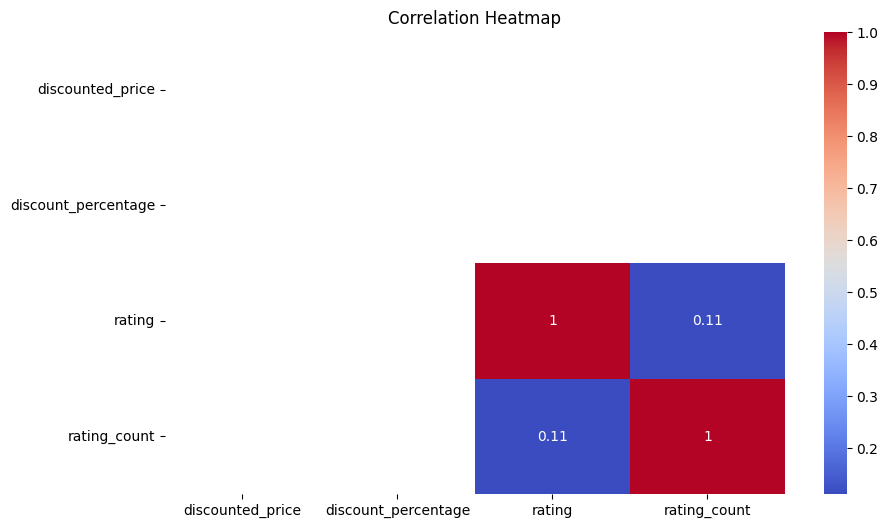

Correlation between discounted_price and rating: nan


In [52]:
#8.What is the correlation between discounted_price and rating?

plt.figure(figsize=(10,6))
# Select only numeric columns for correlation calculation
numeric_df2 = df2.select_dtypes(include=['number'])
sns.heatmap(numeric_df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
correlation = df2['discounted_price'].corr(df2['rating'])
print("Correlation between discounted_price and rating:", correlation)

In [53]:
#9. What are the Top 5 categories based on the highest ratings?
df2.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


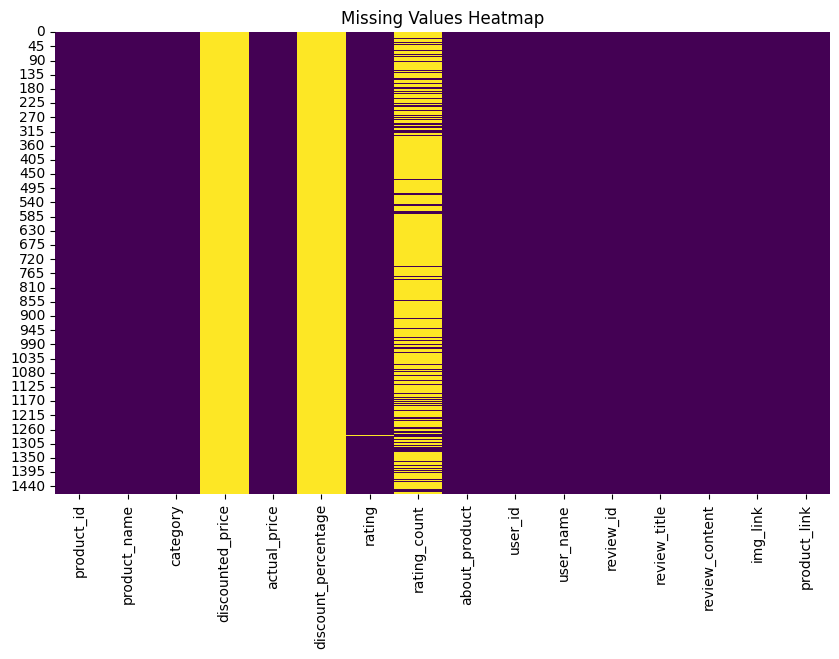

In [56]:
#10.' Identify any potential areas for improvement or optimization based on the data analysis?
df2.isnull().sum()
plt.figure(figsize=(10,6))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

EDA - 4

**Spotify**

In [58]:
df3 = pd.read_csv('/content/drive/MyDrive/DATA ANALYICS/EDA/spotify.csv')
df3.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [59]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
df3.isnull().sum()
df3.duplicated().sum()


np.int64(27)

Text(0, 0.5, 'Frequency')

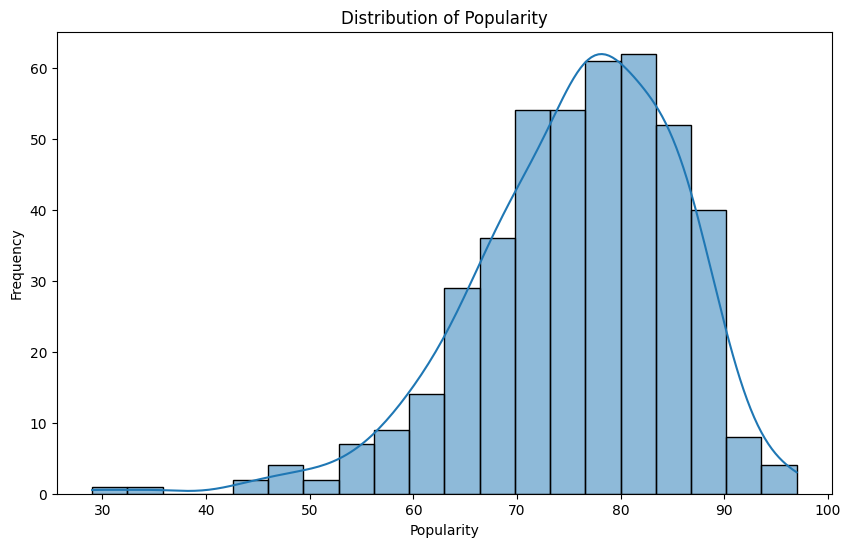

In [61]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
plt.figure(figsize=(10,6))
sns.histplot(data=df3, x='Popularity', bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Duration (ms)')

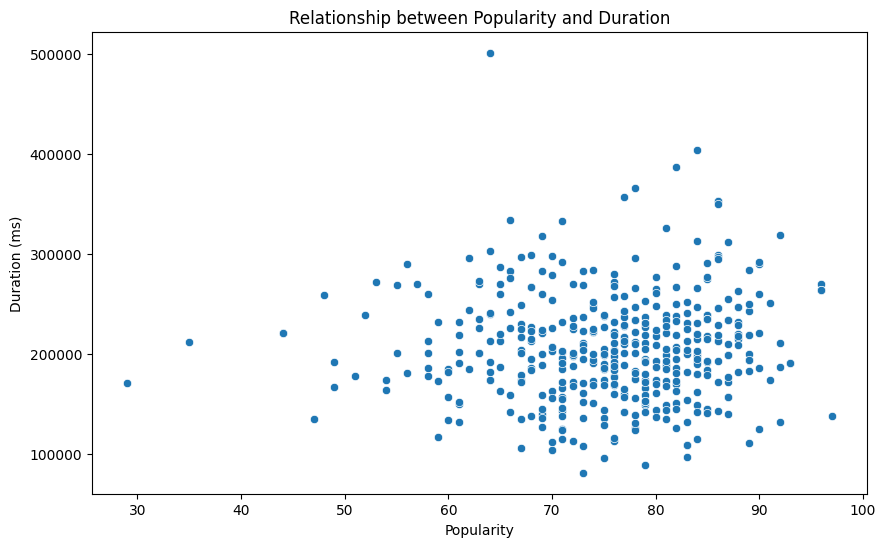

In [63]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df3, x='Popularity', y='Duration (ms)')
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')

Text(0, 0.5, 'Count')

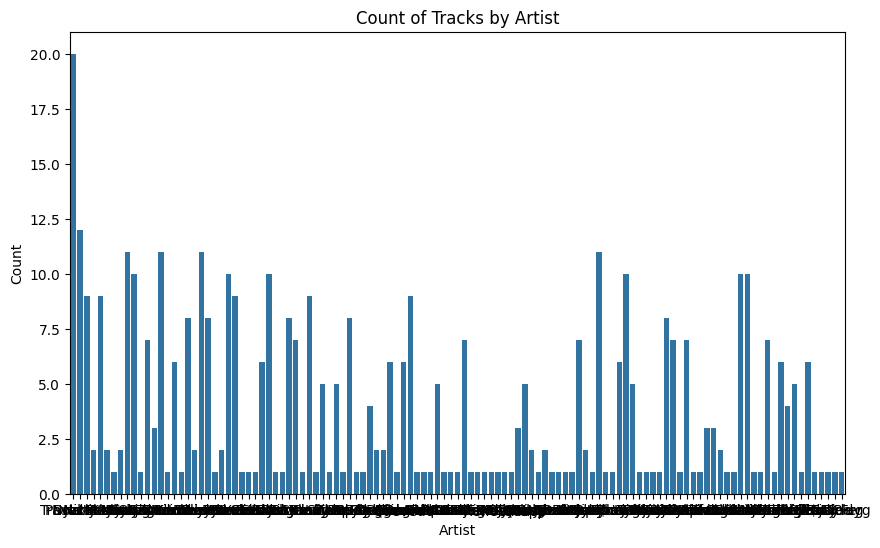

In [66]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
df3['Artist'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(data=df3, x='Artist')
plt.title('Count of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Count')

In [67]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
df3.sort_values(by='Popularity', ascending=True).head(5)


,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB


In [68]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?
df3.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,87.000000
¥$,86.090909


In [72]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
df3.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,87.000000
¥$,86.090909


<Figure size 1000x600 with 0 Axes>

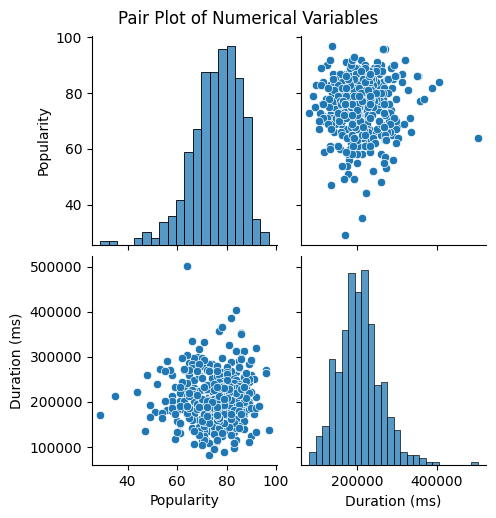

In [74]:
from re import X
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
plt.figure(figsize=(10,6))
sns.pairplot(data=df3, vars=['Popularity', 'Duration (ms)'])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

Text(0, 0.5, 'Duration (ms)')

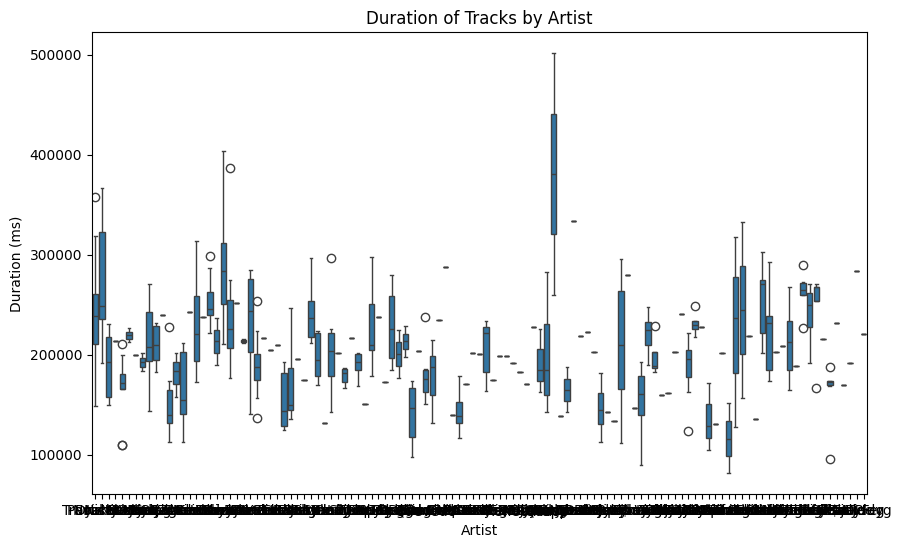

In [75]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(10,6))
sns.boxplot(data=df3, x='Artist', y='Duration (ms)')
plt.title('Duration of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')

Text(0, 0.5, 'Popularity')

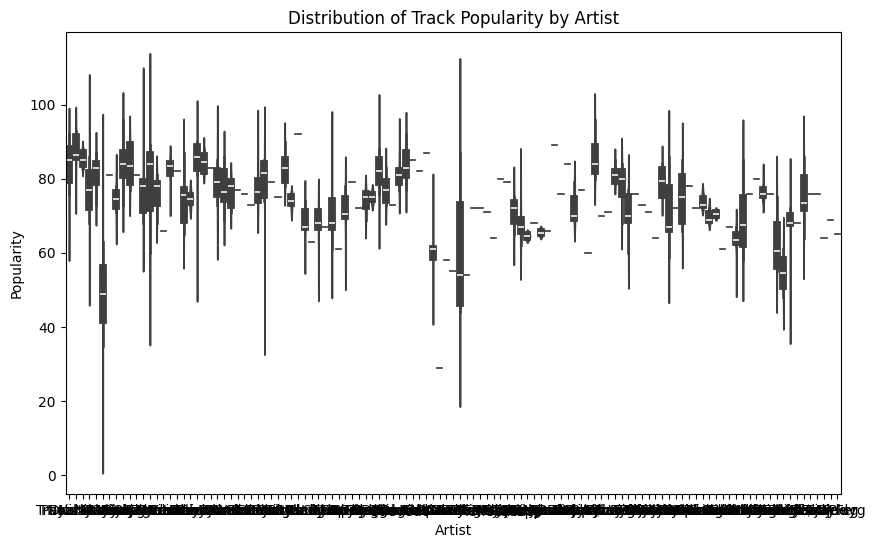

In [80]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(10,6))
sns.violinplot(data=df3, x='Artist', y='Popularity')
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')